<div style="text-align: center;">
    <img src="title.png" width="600"/>
</div>

# 1. Understanding the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('datasetEXAM/machine_failure_data.csv')  # replace with your file path

# Check the first few rows of the dataset
print(df.head())

# Check for missing data
print(df.isnull().sum())

# Check summary statistics
print(df.describe())

  Machine_ID  Usage_Hours  Failures
0  Machine_1          910         0
1  Machine_2         3822         1
2  Machine_3         3142         1
3  Machine_4          516         0
4  Machine_5         4476         1
Machine_ID     0
Usage_Hours    0
Failures       0
dtype: int64
       Usage_Hours     Failures
count  1000.000000  1000.000000
mean   2578.250000     0.523000
std    1390.960625     0.499721
min      53.000000     0.000000
25%    1389.500000     0.000000
50%    2647.000000     1.000000
75%    3693.250000     1.000000
max    4998.000000     1.000000


# 2. Data exploration

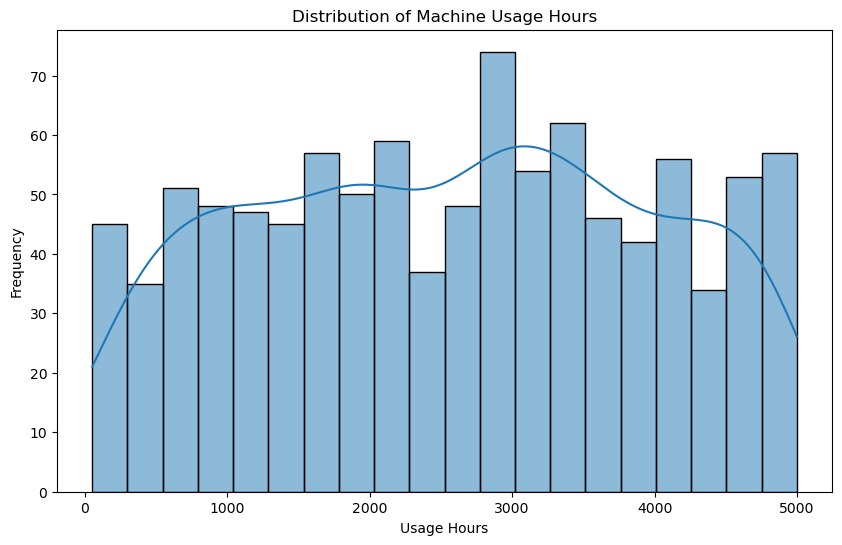

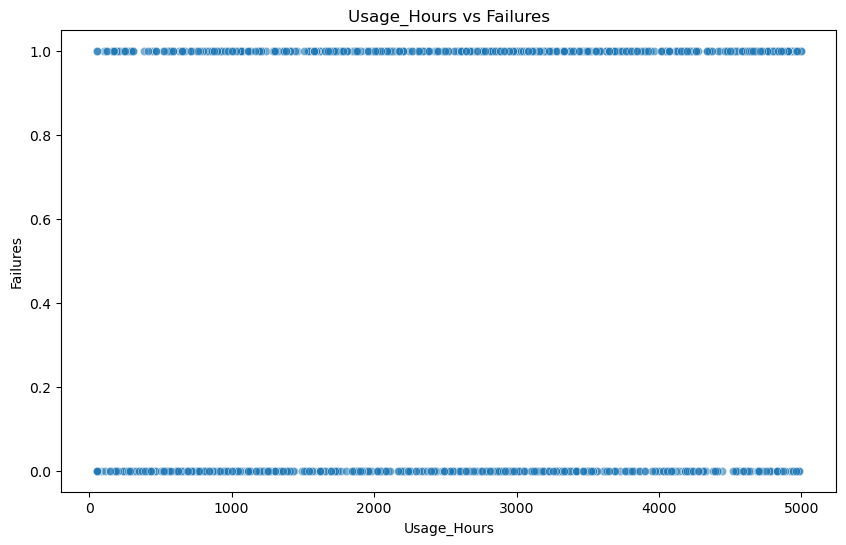

In [5]:
# Visualize the distribution of usage hours
plt.figure(figsize=(10, 6))
sns.histplot(df['Usage_Hours'], kde=True, bins=20)
plt.title('Distribution of Machine Usage Hours')
plt.xlabel('Usage Hours')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Usage Hours vs Failures
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Usage_Hours', y='Failures', data=df, alpha=0.6)
plt.title('Usage_Hours vs Failures')
plt.xlabel('Usage_Hours')
plt.ylabel('Failures')
plt.show()

# 3. Bayesian Inference Model
**Prior Probability of Failure**<br/>

In [8]:
# Prior Probability: Proportion of failures
prior_failure = df['Failures'].mean()
print(f'Prior Probability of Failure: {prior_failure:.4f}')

Prior Probability of Failure: 0.5230


**Likelihood of Failure**

In [11]:
from scipy.stats import norm

# Separate data into failures and no failures
failures = df[df['Failures'] == 1]['Usage_Hours']
no_failures = df[df['Failures'] == 0]['Usage_Hours']

# Estimate mean and std for both groups
failure_mean, failure_std = failures.mean(), failures.std()
no_failure_mean, no_failure_std = no_failures.mean(), no_failures.std()

print(f'Failure Mean: {failure_mean}, Failure Std: {failure_std}')
print(f'No Failure Mean: {no_failure_mean}, No Failure Std: {no_failure_std}')

Failure Mean: 2753.432122370937, Failure Std: 1376.980940402061
No Failure Mean: 2386.174004192872, No Failure Std: 1382.2376120977135


# Calculatation of failure

In [19]:
# Example: Likelihood of failure at 200 usage hours
usage_hours = 200
likelihood_fail = likelihood_of_failure(usage_hours, failure_mean, failure_std)
likelihood_no_fail = likelihood_of_failure(usage_hours, no_failure_mean, no_failure_std)

print(f'Likelihood of failure at {usage_hours} hours: {likelihood_fail}')
print(f'Likelihood of no failure at {usage_hours} hours: {likelihood_no_fail}')

Likelihood of failure at 200 hours: 5.191352489495001e-05
Likelihood of no failure at 200 hours: 8.262835734023545e-05


# Bayes' Theorem

In [23]:
# Calculate posterior probability using Bayes' Theorem
def posterior_probability(usage_hours):
    p_failure = prior_failure
    p_no_failure = 1 - prior_failure
    p_usage_given_failure = likelihood_of_failure(usage_hours, failure_mean, failure_std)
    p_usage_given_no_failure = likelihood_of_failure(usage_hours, no_failure_mean, no_failure_std)
    
    # P(Usage Hours) is the total probability of the usage hours
    p_usage = p_usage_given_failure * p_failure + p_usage_given_no_failure * p_no_failure
    
    # Apply Bayes' Theorem
    p_failure_given_usage = (p_usage_given_failure * p_failure) / p_usage
    return p_failure_given_usage

# Example: Posterior probability of failure at 200 usage hours
posterior_fail_prob = posterior_probability(200)
print(f'Posterior Probability of Failure at 200 usage hours: {posterior_fail_prob:.4f}')

Posterior Probability of Failure at 200 usage hours: 0.4079


# 4. Prediction

In [26]:
# Predict probability of failure for a machine with 150 usage hours
predicted_failure_prob = posterior_probability(150)
print(f'Predicted Probability of Failure at 150 usage hours: {predicted_failure_prob:.4f}')

Predicted Probability of Failure at 150 usage hours: 0.4054


# 5. Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error

# Generate predictions for all data points
predictions = df['Usage_Hours'].apply(posterior_probability)

# Calculate MSE
mse = mean_squared_error(df['Failures'], predictions)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.2451


# 6. Interpretation of Results

**•	Maintenance Scheduling:** This model can help in predicting when machines are likely to fail, allowing for more efficient scheduling of preventive maintenance.<br/>
**•	Replacement Decisions:** By predicting failure probability, companies can make more informed decisions about when to replace machines.<br/>
**•	Operational Downtime:** Minimizing downtime is crucial in manufacturing and service industries, and the Bayesian model can help reduce downtime by predicting failure events ahead of time.<br/><br/>
**Real-World Application:**<br/>
**•	Maintenance Scheduling:** This model can help in predicting when machines are likely to fail, allowing for more efficient scheduling of preventive maintenance.<br/>
**•	Replacement Decisions:** By predicting failure probability, companies can make more informed decisions about when to replace machines.<br/>
**•	Operational Downtime:** Minimizing downtime is crucial in manufacturing and service industries, and the Bayesian model can help reduce downtime by predicting failure events ahead of time.
   

<div style="text-align: center;">
    <img src="questionthree.png" width="600"/>
</div>